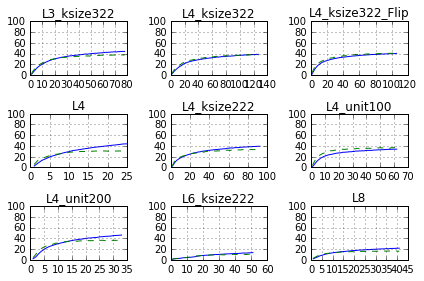

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

def Load(fileName):
    #print fileName
    d = pd.read_csv(fileName)
    dTest  = d[d["mode"]=="Test"]
    dTrain = d[d["mode"]=="Train"]
    return dTest,dTrain


fNames = ["L3_ksize322","L4_ksize322","L4_ksize322_Flip","L4","L4_ksize222","L4_unit100","L4_unit200","L6_ksize222","L8","L4_unit1000","L8_Unit100"]
#fNames = ["L3_ksize322","L4","L4_ksize222","L4_unit100","L4_unit200","L6_ksize222","L8","L8_Unit100"]
#fNames = ["L6_ksize222","L8","L8_Unit100"]
fig, axes = plt.subplots(3,3)
for i,row in enumerate(axes):
    for j, cell in enumerate(row):
        index = i*len(row) + j 
        if index>=len(fNames): continue
        name  = fNames[index]
        dTest,dTrain = Load("Output/"+name+"/output.dat")
        cell.set_title(name)
        cell.plot(dTrain["epoch"],dTrain["accuracy"]*100,"-" )
        cell.plot(dTest ["epoch"],dTest ["accuracy"]*100,"--")
        cell.set_ylim(0,100)
        cell.grid()
fig.tight_layout()


段数に関し：
 - 段数が少なく、3,4程度が最高の成績
 - ただ原理的に段数が多い際に性能が悪くなることは起こるはずはないので、これはあくまで学習のさせ方が悪いということだと思う。AutoEncoderのような学習の進め方を研究する必要がある
 
L1段のunit数に関し：
 - 100を超えていれば、Test dataに関しては同様な水準
 - ただし、Training dataに関しては、unit数が多ければ多いほど学習が進む。これがいわゆる過学習の効果
 - なので、闇雲にunit数を増やしたとて、Test dataの性能が向上するというわけではなさそう
 
ksize(MaxPoolingの対象画素)に関し：
 - 初段が大きい構造(322)のほうが、222よりも良い成績
 
左右Flipさせたデータを加え、augumentationを行ったデータに関し：
 - 若干数値は向上
 - 学習回数が実質２倍に増加しているにもかかわらず、Test dataの過学習が進んでおらず、その点における効果が主
 - なので、もしデータセットを２倍に増やせるのであれば、別にaugumentationを行う必要は必ずしもなさそう
 

In [32]:
aList = []
for i in fNames:
    dTest,dTrain = Load("Output/"+i+"/output.dat")
    aList.append((i,np.array(dTest["accuracy"])[-1]*100.))
    #print "%20s: %.1f%%"%(i,np.array(dTest["accuracy"])[-1]*100.)
for i in sorted(aList,key=lambda x: x[1],reverse=True):
    print "%20s: %.1f%%"%i

    L4_ksize322_Flip: 40.2%
         L4_ksize322: 37.7%
         L3_ksize322: 37.3%
          L4_unit200: 36.1%
          L4_unit100: 35.7%
         L4_ksize222: 33.1%
                  L4: 29.7%
         L4_unit1000: 19.8%
          L8_Unit100: 17.2%
                  L8: 15.7%
         L6_ksize222: 10.5%
